**FINDING MRI SCANS FOR BRAIN TUMOR**


lets find the dataset link from kagle: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


**IMPORT PACKAGES**

In [1]:
import numpy as np
import random
import sys

In [2]:
import torch

In [3]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset

In [61]:
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2


#**reading the images**


In [5]:
tumor = []
path = "/content/drive/MyDrive/brain_tumor_dataset/yes/*.jpg"
for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r= cv2.split(img)
  img = cv2.merge([r,g,b])
  tumor.append(img)



In [6]:
healthy = []
path = "/content/drive/MyDrive/brain_tumor_dataset/no/*.jpg"
for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r= cv2.split(img)
  img = cv2.merge([r,g,b])
  healthy.append(img)


In [10]:
len(tumor)

86

In [11]:
len(healthy)

85

**PREPROCESSING THE IMAGES FOR THE MACHINE ALGO**

In [12]:
healthy = np.array(healthy)
tumor = np.array(tumor)
All = np.concatenate((healthy,tumor))

In [13]:
All.shape

(171, 128, 128, 3)

**VISUALIZING SCANS**

In [14]:
def plot_random(healthy, tumor,num=5):
  healthy_imgs = healthy[np.random.choice(healthy.shape[0], num , replace=False)]
  tumor_imgs = tumor[np.random.choice(tumor.shape[0], num , replace=False)]

  plt.figure(figsize=(16,9))
  for i in  range(num):
    plt.subplot(1,num,i+1)
    plt.title('healthy')
    plt.imshow(healthy_imgs[i])


  plt.figure(figsize=(16,9))
  for i in  range(num):
    plt.subplot(1,num,i+1)
    plt.title('tumor')
    plt.imshow(tumor_imgs[i])
  plt.show()

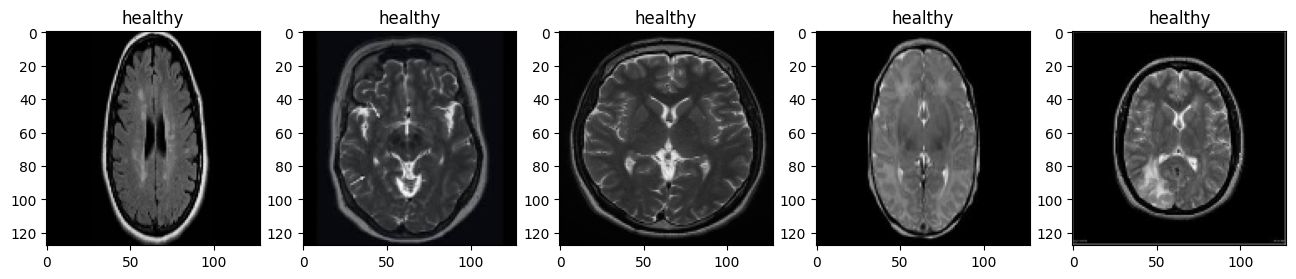

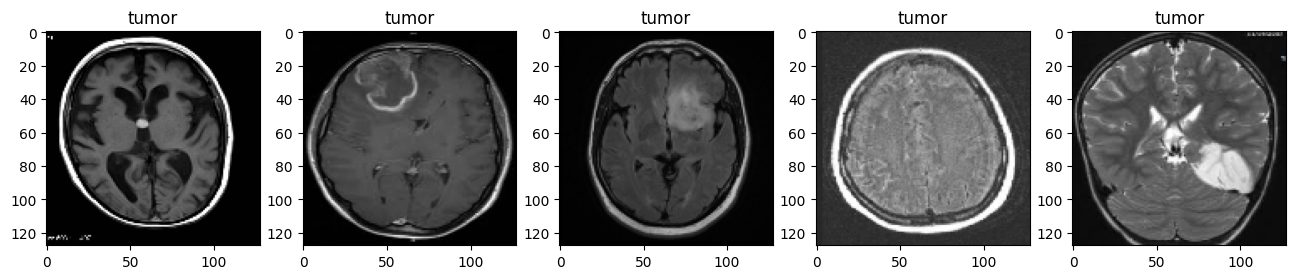

In [15]:
plot_random(healthy,tumor)

#**TORCH DATA SET CLASS**

In [16]:
class Dataset(object):



  def __getitem__(self, index):
    raise NotImplementedError

  def __len__(self):
    raise NotImplementedError

  def __add__(self, other):
    return ConcatDataset([self, other])

#*CREATING MRI CUSTOM DATASET**


In [72]:
class MRI(Dataset):
  def __init__(self):

    tumor = []
    healthy = []

    for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/yes/*.jpg"):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r= cv2.split(img)
      img = cv2.merge([r,g,b])
      img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
      tumor.append(img)


    for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/no/*.jpg"):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r= cv2.split(img)
      img = cv2.merge([r,g,b])
      img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
      healthy.append(img)

  #images
    tumor =np.array(tumor , dtype=np.float32)
    healthy = np.array(healthy , dtype=np.float32)

  # labels

    labels_tumor = np.ones(tumor.shape[0],dtype=np.float32)
    labels_healthy = np.zeros(healthy.shape[0],dtype=np.float32)




    self.images = np.concatenate((tumor,healthy), axis=0)
    self.labels = np.concatenate((labels_tumor,labels_healthy))


  def __len__(self):
    return self.images.shape[0]

  def __getitem__ (self, index):
    sample = {'image' : self.images[index], 'label': self.labels[index]}
    return sample

  def normalize(self):
    self.images = self.images/255


In [73]:
mri = MRI()

In [74]:
mri.normalize()

# creating a dataloader
  **for our dataset**

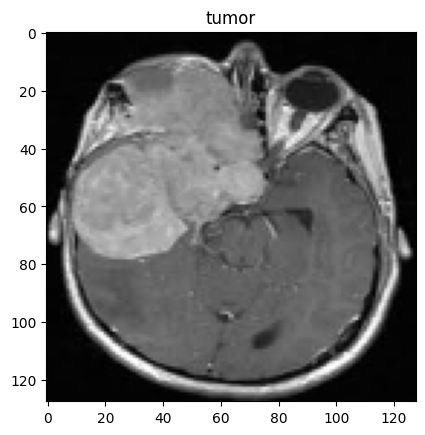

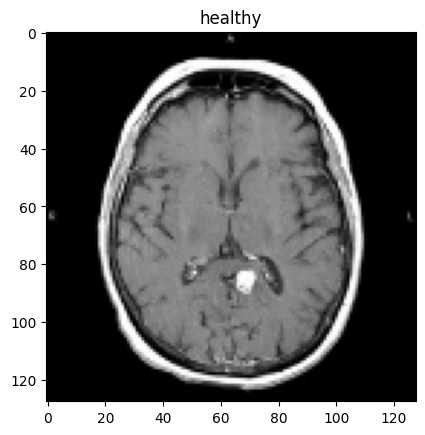

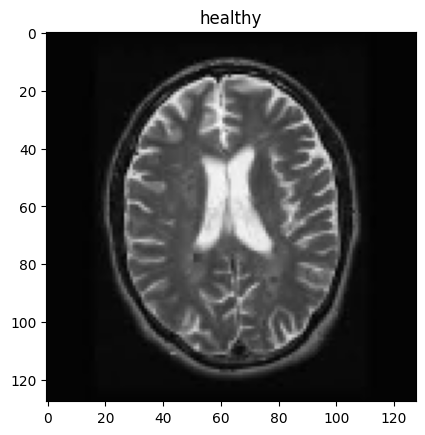

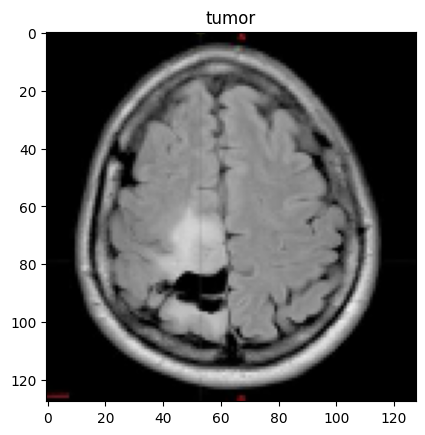

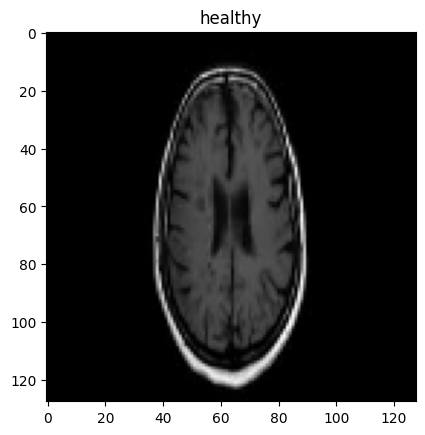

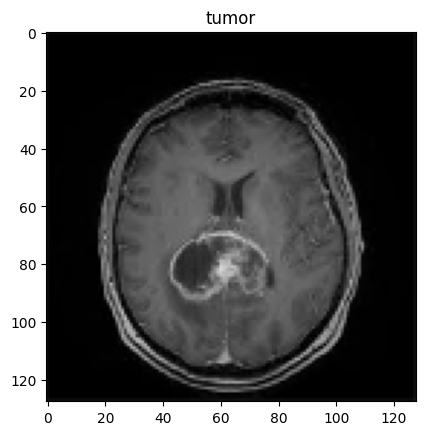

In [75]:
names = {0:'healthy', 1:'tumor'}
dataloader = DataLoader(mri, shuffle=True)
for i, sample in enumerate(dataloader):
  img = sample['image'].squeeze()
  img = img.reshape((img.shape[1],img.shape[2],img.shape[0]))
  plt.title(names[sample['label'].item()])
  plt.imshow(img)
  plt.show()
  if i==5:
    break

# CREATING CNN I.E CONVOLUTION NEURAL NETWORKS

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))

    self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))

  def forward(self, x):
      x = self.cnn_model(x)
      x = x.view(x.size(0), -1)
      x = self.fc_model(x)
      x = F.sigmoid(x)
      return x


In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


cpu_tensor = torch.rand(10).to(device)

gpu_tensor = cpu_tensor.to(device)

print(cpu_tensor, cpu_tensor.dtype, type(cpu_tensor), cpu_tensor.type())
print(gpu_tensor, gpu_tensor.dtype, type(gpu_tensor), gpu_tensor.type())

print(cpu_tensor*gpu_tensor)

tensor([0.6786, 0.8635, 0.0393, 0.0401, 0.4131, 0.8069, 0.8084, 0.0982, 0.5004,
        0.2439], device='cuda:0') torch.float32 <class 'torch.Tensor'> torch.cuda.FloatTensor
tensor([0.6786, 0.8635, 0.0393, 0.0401, 0.4131, 0.8069, 0.8084, 0.0982, 0.5004,
        0.2439], device='cuda:0') torch.float32 <class 'torch.Tensor'> torch.cuda.FloatTensor
tensor([0.4605, 0.7457, 0.0015, 0.0016, 0.1707, 0.6511, 0.6535, 0.0096, 0.2504,
        0.0595], device='cuda:0')


In [32]:
mri = MRI()
mri.normalize()
device = torch.device('cuda:0')
model = CNN().to(device)

In [33]:
dataloader = DataLoader(mri, batch_size=32, shuffle=False)

In [34]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())


In [35]:
outputs = np.concatenate( outputs, axis=0 ).squeeze()
y_true = np.concatenate( y_true, axis=0 ).squeeze()

In [36]:
def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x

In [37]:
accuracy_score(y_true, threshold(outputs))

0.49707602339181284

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

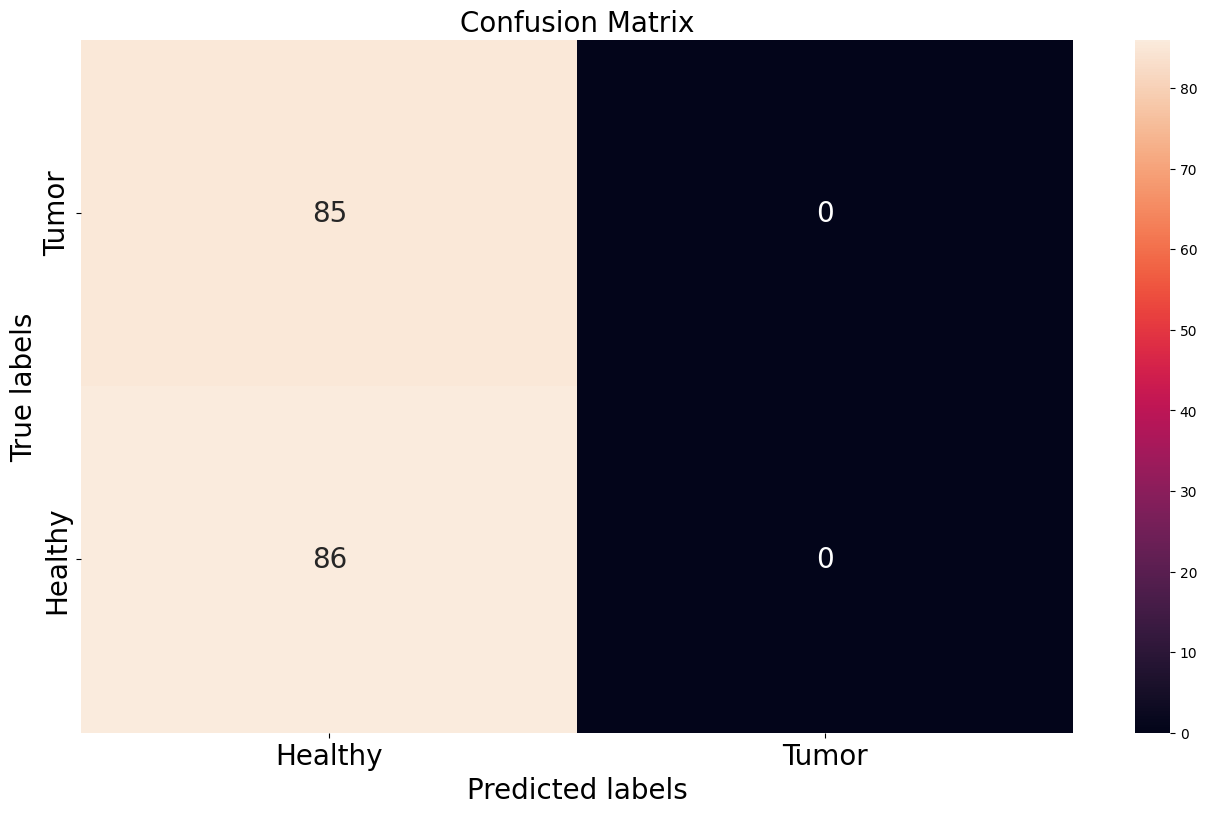

In [38]:
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

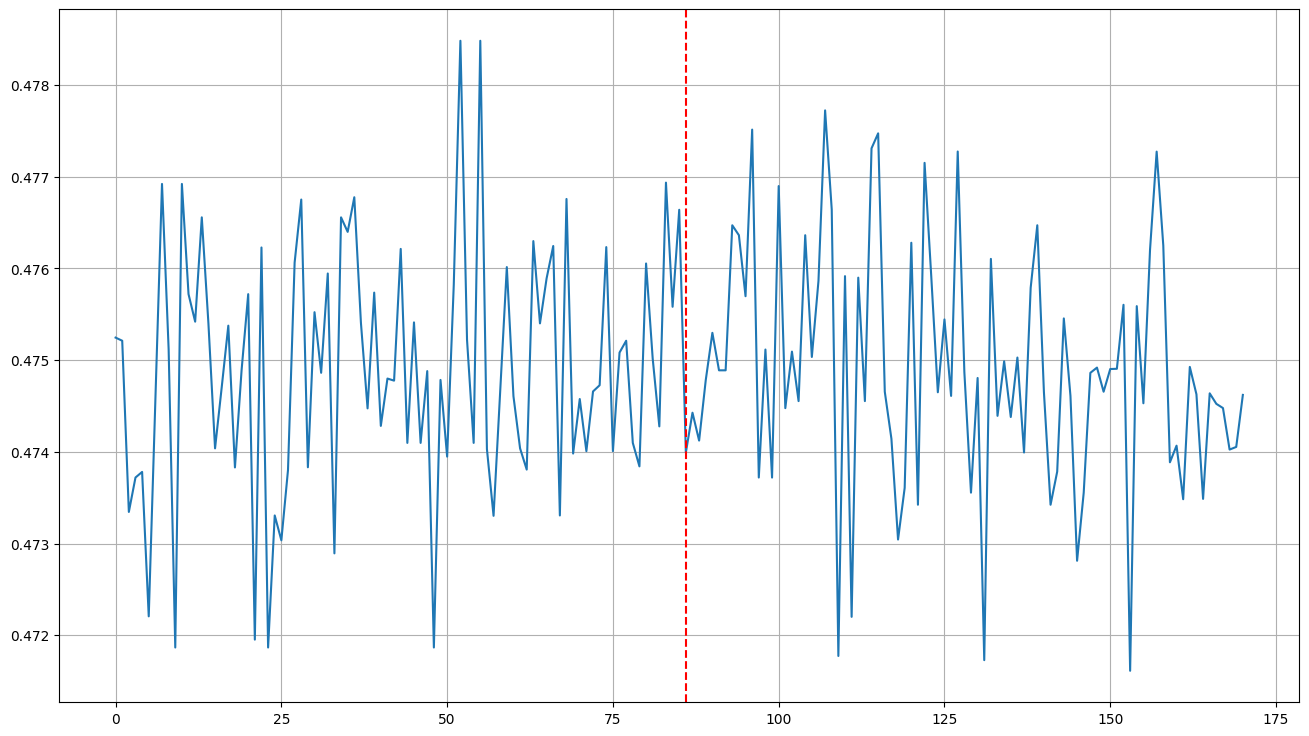

In [39]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# **DUMB MODEL**

In [41]:
eta = 0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(mri, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [42]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)

        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))

Train Epoch: 10	Loss: 0.664590
Train Epoch: 20	Loss: 0.623335
Train Epoch: 30	Loss: 0.573463
Train Epoch: 40	Loss: 0.590068
Train Epoch: 50	Loss: 0.521636
Train Epoch: 60	Loss: 0.504912
Train Epoch: 70	Loss: 0.523466
Train Epoch: 80	Loss: 0.455084
Train Epoch: 90	Loss: 0.420945
Train Epoch: 100	Loss: 0.415426
Train Epoch: 110	Loss: 0.377211
Train Epoch: 120	Loss: 0.339037
Train Epoch: 130	Loss: 0.305092
Train Epoch: 140	Loss: 0.292492
Train Epoch: 150	Loss: 0.258638
Train Epoch: 160	Loss: 0.231533
Train Epoch: 170	Loss: 0.229223
Train Epoch: 180	Loss: 0.200966
Train Epoch: 190	Loss: 0.170963
Train Epoch: 200	Loss: 0.140540
Train Epoch: 210	Loss: 0.116364
Train Epoch: 220	Loss: 0.115817
Train Epoch: 230	Loss: 0.088076
Train Epoch: 240	Loss: 0.068422
Train Epoch: 250	Loss: 0.059355
Train Epoch: 260	Loss: 0.045488
Train Epoch: 270	Loss: 0.049286
Train Epoch: 280	Loss: 0.028536
Train Epoch: 290	Loss: 0.023520
Train Epoch: 300	Loss: 0.020651
Train Epoch: 310	Loss: 0.015705
Train Epoch: 320	

#EVALUATING THE SMART MODEL WHICH WAS JUST TRAINED



In [44]:
model.eval()
dataloader = DataLoader(mri, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [45]:
accuracy_score(y_true, threshold(outputs))

1.0

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

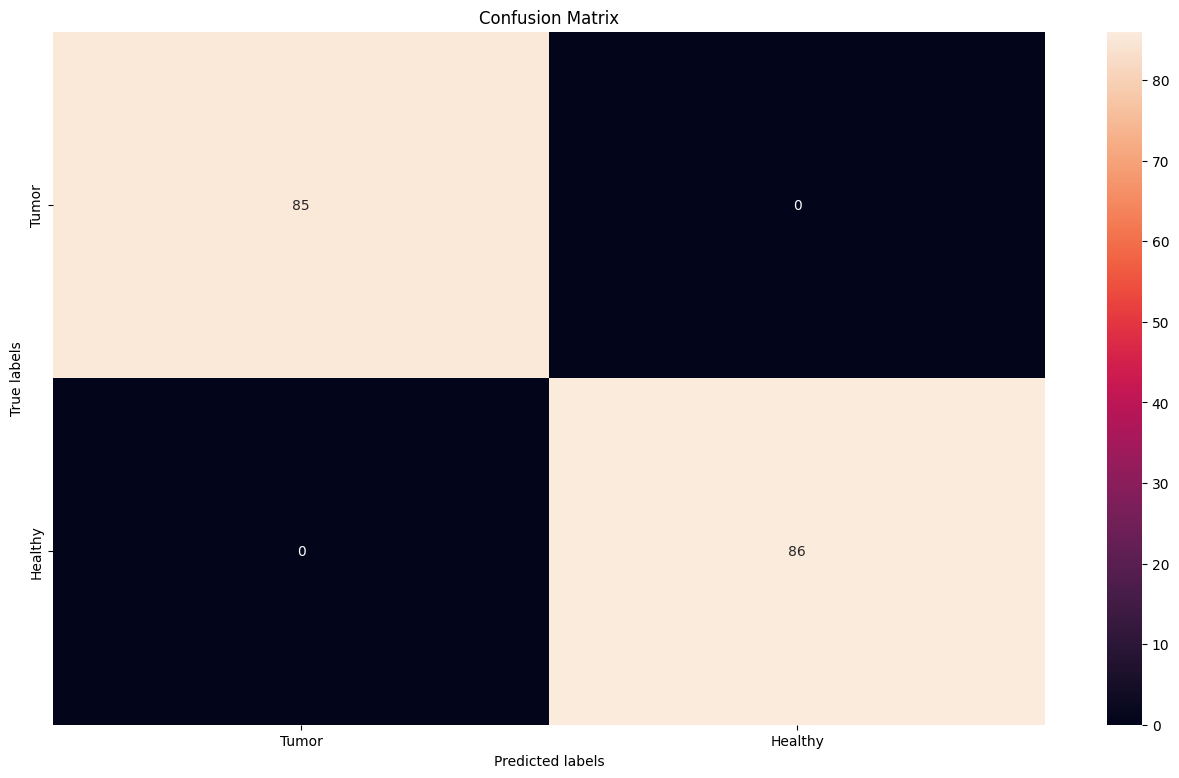

In [47]:
cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Tumor','Healthy'])
ax.yaxis.set_ticklabels(['Tumor','Healthy'])

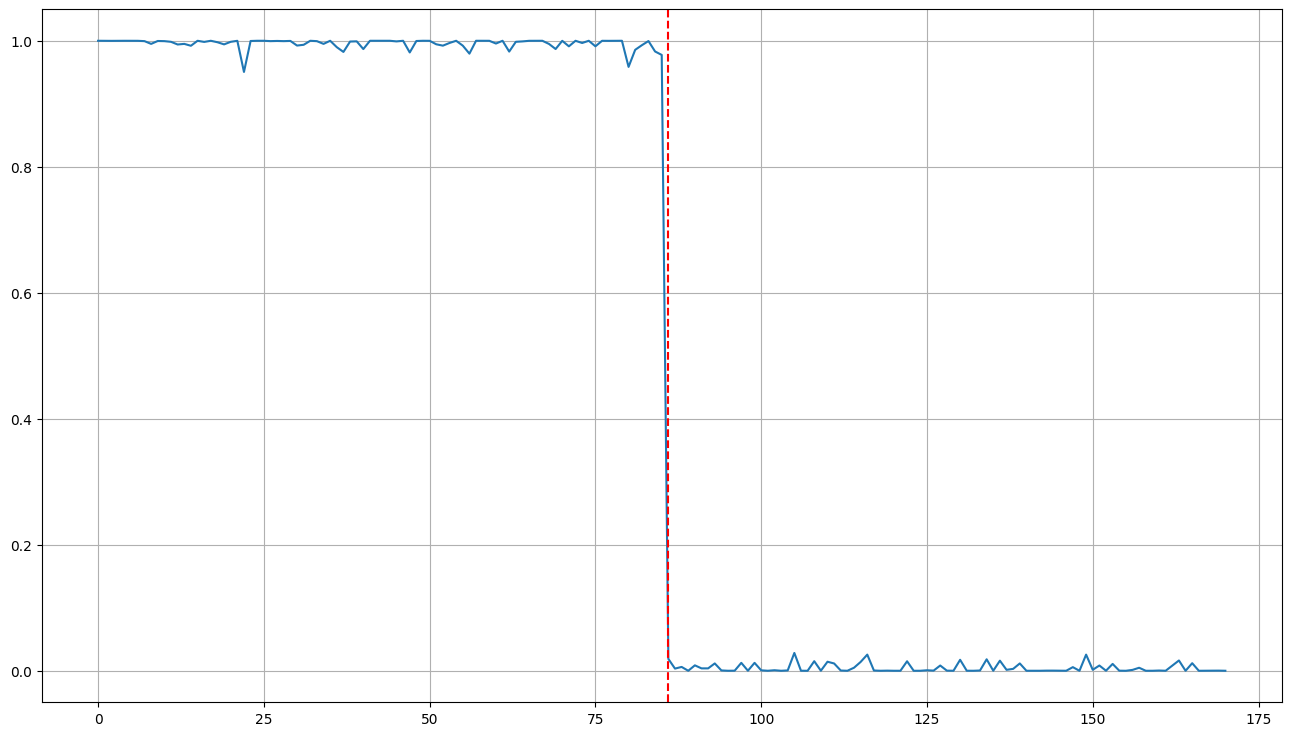

In [48]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

#VISUALISNG MODEL


In [49]:
model


CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [50]:
no_of_layers = 0
conv_layers = []

In [51]:
model_children = list(model.children())
model_children


[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ),
 Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [52]:
for child in model_children:
    if type(child) == nn.Sequential:
        for layer in child.children():
            if type(layer) == nn.Conv2d:
                no_of_layers += 1
                conv_layers.append(layer)

In [ ]:
conv_layers

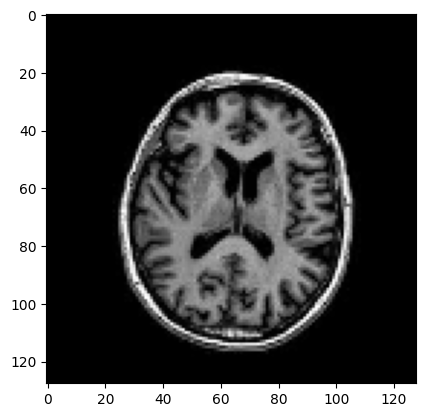

In [54]:
img = mri[100]['image']
plt.imshow(img.reshape(128,128,3))

In [55]:
img = torch.from_numpy(img).to(device)

In [56]:
img.shape

torch.Size([3, 128, 128])

In [57]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [58]:
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results

Layer  1


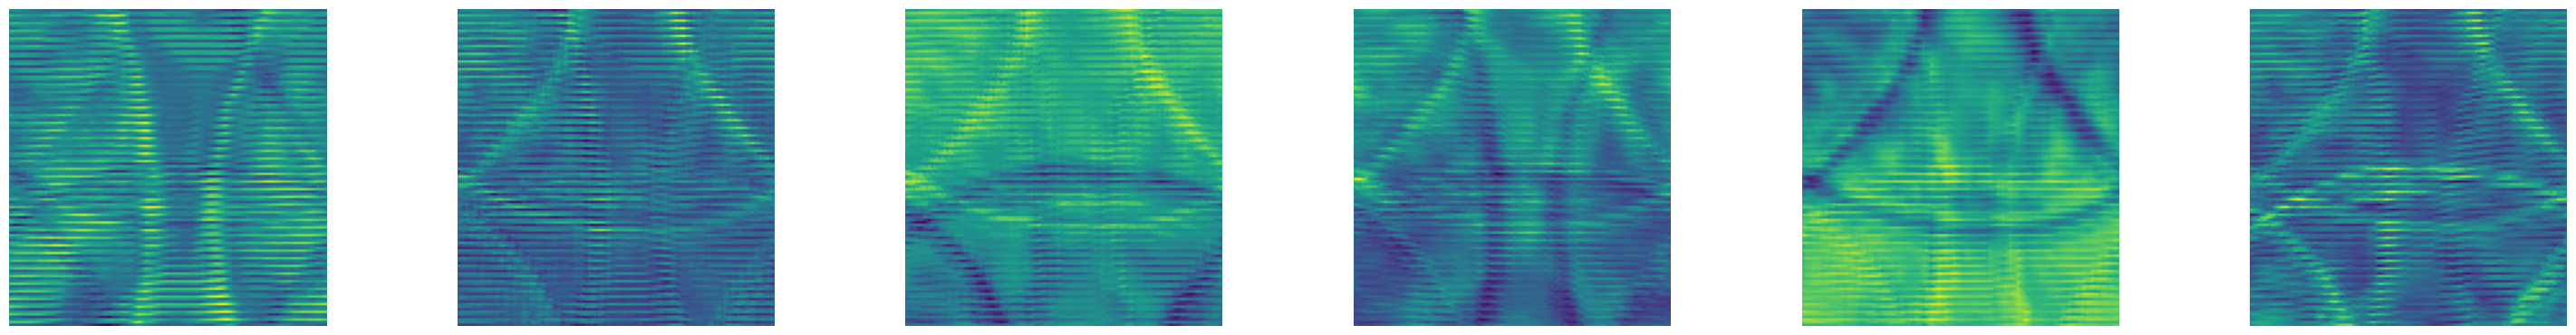

Layer  2


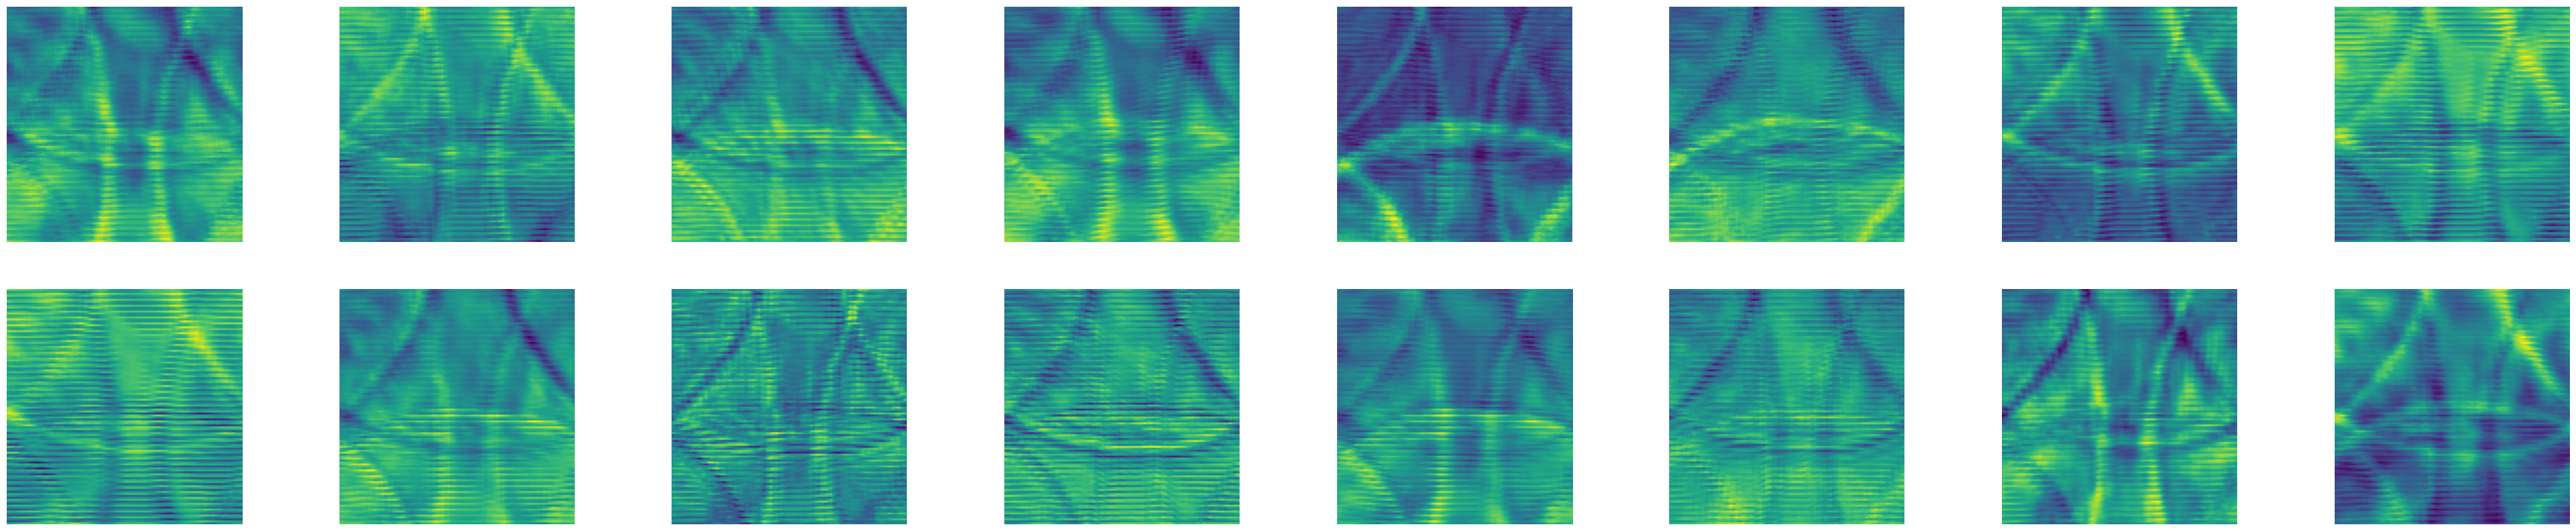

In [59]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()

In [62]:
from sklearn.model_selection import train_test_split

In [77]:
class MRI(Dataset):

    def __init__(self):
        self.X_train, self.y_train, self.X_val, self.y_val = None, None, None, None
        self.mode = 'train'

        tumor = []
        healthy = []
        for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            tumor.append(img)

        for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            healthy.append(img)

        tumor = np.array(tumor, dtype=np.float32)
        healthy = np.array(healthy, dtype=np.float32)
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))

    def train_val_split(self):
        self.X_train, self.X_val, self.y_train, self.y_val = \
        train_test_split(self.images, self.labels, test_size=0.20, random_state=42)

    def __len__(self):
        if self.mode == 'train':
            return self.X_train.shape[0]
        elif self.mode == 'val':
            return self.X_val.shape[0]

    def __getitem__(self, idx):
        if self.mode == 'train':
            sample = {'image': self.X_train[idx], 'label': self.y_train[idx]}
        elif self.mode == 'val':
            sample = {'image': self.X_val[idx], 'label': self.y_val[idx]}
        return sample

    def normalize(self):
        self.images = self.images / 255.0


In [78]:
mri = MRI()
mri.normalize()
mri.train_val_split()

In [80]:
train_dataloader = DataLoader(mri, batch_size=32, shuffle=True)
val_dataloader = DataLoader(mri, batch_size=32, shuffle=False)

In [81]:
device = torch.device("cuda:0")
model = CNN().to(device)

In [82]:
eta=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [83]:
epoch_train_loss = []
epoch_val_loss = []

In [84]:
for epoch in range(1, 600):
    train_losses = []
    model.train()
    mri.mode = 'train'
    for D in train_dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    epoch_train_loss.append(np.mean(train_losses))

    val_losses = []
    model.eval()
    mri.mode = 'val'

    with torch.no_grad():
        for D in val_dataloader:
            data = D['image'].to(device)
            label = D['label'].to(device)
            y_hat = model(data)
            error = nn.BCELoss()
            loss = torch.sum(error(y_hat.squeeze(), label))
            val_losses.append(loss.item())

    epoch_val_loss.append(np.mean(val_losses))

    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tTrain Loss: {:.6f}\tVal Loss: {:.6f}'.format(epoch+1, np.mean(train_losses), np.mean(val_losses)))


Train Epoch: 10	Train Loss: 0.680019	Val Loss: 0.680442
Train Epoch: 20	Train Loss: 0.652988	Val Loss: 0.641302
Train Epoch: 30	Train Loss: 0.617492	Val Loss: 0.569481
Train Epoch: 40	Train Loss: 0.597225	Val Loss: 0.513774
Train Epoch: 50	Train Loss: 0.514359	Val Loss: 0.511275
Train Epoch: 60	Train Loss: 0.489571	Val Loss: 0.499948
Train Epoch: 70	Train Loss: 0.450555	Val Loss: 0.538274
Train Epoch: 80	Train Loss: 0.505646	Val Loss: 0.504315
Train Epoch: 90	Train Loss: 0.421723	Val Loss: 0.503299
Train Epoch: 100	Train Loss: 0.413614	Val Loss: 0.492616
Train Epoch: 110	Train Loss: 0.395327	Val Loss: 0.499660
Train Epoch: 120	Train Loss: 0.327415	Val Loss: 0.517443
Train Epoch: 130	Train Loss: 0.318208	Val Loss: 0.491368
Train Epoch: 140	Train Loss: 0.350038	Val Loss: 0.489886
Train Epoch: 150	Train Loss: 0.293071	Val Loss: 0.494420
Train Epoch: 160	Train Loss: 0.281255	Val Loss: 0.502564
Train Epoch: 170	Train Loss: 0.268823	Val Loss: 0.502990
Train Epoch: 180	Train Loss: 0.219224	Va

Text(0, 0.5, 'Loss')

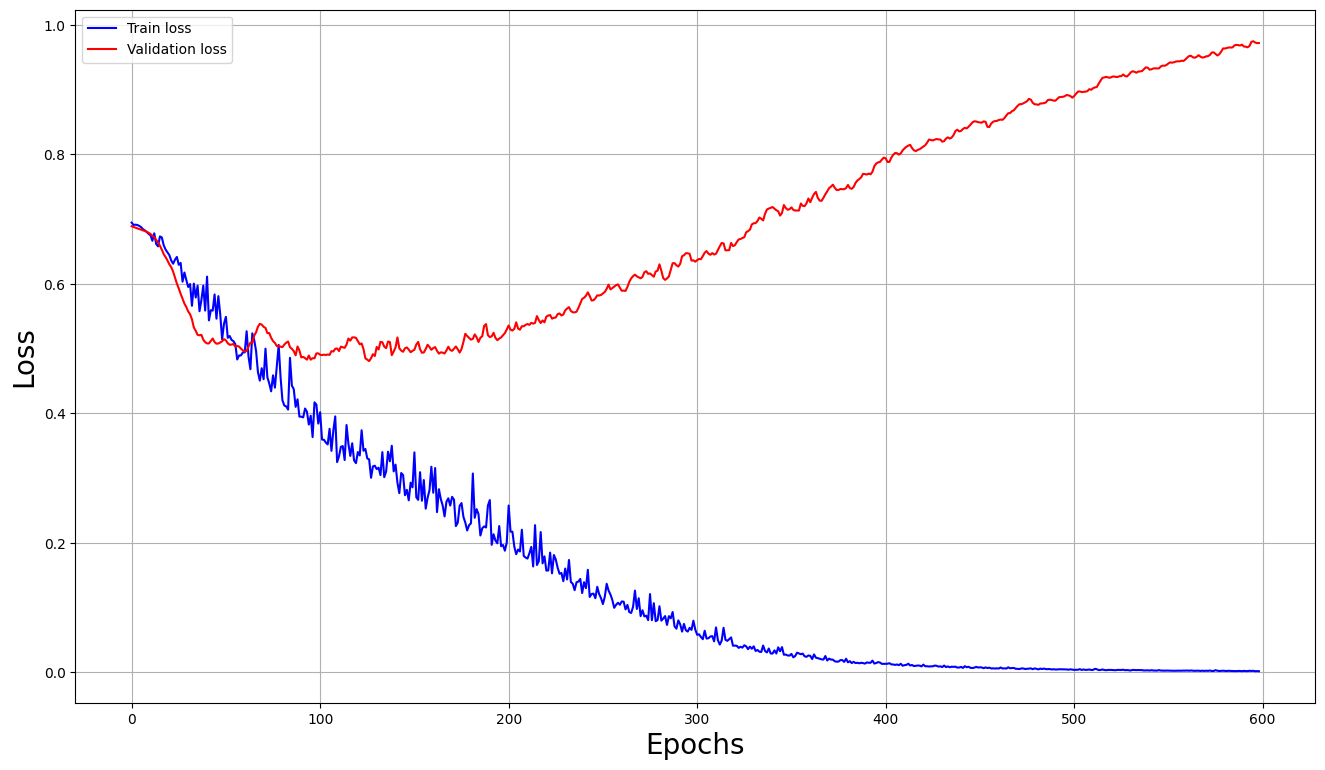

In [85]:
plt.figure(figsize=(16,9))
plt.plot(epoch_train_loss, c='b', label='Train loss')
plt.plot(epoch_val_loss, c='r', label = 'Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)